In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import itertools
import collections
from keras.models import load_model
%matplotlib inline

In [4]:
path = '/content/drive/MyDrive/mit_bih/'

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/mit_bih/100.csv
/content/drive/MyDrive/mit_bih/101.csv
/content/drive/MyDrive/mit_bih/100annotations.txt
/content/drive/MyDrive/mit_bih/102annotations.txt
/content/drive/MyDrive/mit_bih/101annotations.txt
/content/drive/MyDrive/mit_bih/103.csv
/content/drive/MyDrive/mit_bih/102.csv
/content/drive/MyDrive/mit_bih/103annotations.txt
/content/drive/MyDrive/mit_bih/104.csv
/content/drive/MyDrive/mit_bih/104annotations.txt
/content/drive/MyDrive/mit_bih/105.csv
/content/drive/MyDrive/mit_bih/106.csv
/content/drive/MyDrive/mit_bih/105annotations.txt
/content/drive/MyDrive/mit_bih/108.csv
/content/drive/MyDrive/mit_bih/107annotations.txt
/content/drive/MyDrive/mit_bih/107.csv
/content/drive/MyDrive/mit_bih/106annotations.txt
/content/drive/MyDrive/mit_bih/108annotations.txt
/content/drive/MyDrive/mit_bih/109.csv
/content/drive/MyDrive/mit_bih/111annotations.txt
/content/drive/MyDrive/mit_bih/111.csv
/content/drive/MyDrive/mit_bih/109annotations.txt
/content/drive/MyDriv

In [12]:
window_size = 160
maximum_counting = 1000
classes = ['N', 'L', 'R', 'A', 'V', '/','F']
n_classes = len(classes)
count_classes = [0]*n_classes
X = list()
y = list()
filenames = next(os.walk(path))[2]
records = list()
annotations = list()
filenames.sort()

for f in filenames:
    filename, file_extension = os.path.splitext(f)
    
    # *.csv
    if(file_extension == '.csv'):
        records.append(path + filename + file_extension)

    # *.txt
    else:
        annotations.append(path + filename + file_extension)

for r in range(0,len(records)):
    signals = []

    with open(records[r], 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') 
        row_index = -1
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1
    '''        
    if r is 22:
        # Plot each patient's signal
        plt.title(records[22] + " Wave")
        plt.plot(signals)
        plt.show()'''

    with open(annotations[r], 'r') as fileID:
        data = fileID.readlines() 
        beat = list()

        for d in range(2, len(data)-1): # 0 index is Head
            last_splitted = data[d-1].split(' ')
            next_splitted = data[d+1].split(' ')
            splitted = data[d].split(' ')
            splitted = filter(None, splitted)
            last_splitted = filter(None, last_splitted)
            next_splitted = filter(None, next_splitted)
            next(splitted) # Time
            next(last_splitted) # Time
            next(next_splitted) # Time
            pos_cur = int(next(splitted)) # Sample ID
            pos_last = int(next(last_splitted)) # Sample ID
            pos_next = int(next(next_splitted)) # Sample ID
            arrhythmia_type_cur = next(splitted) # Type
            arrhythmia_type_next = next(next_splitted) # Type
            arrhythmia_type_last = next(last_splitted) # Type
            if(arrhythmia_type_cur in classes and arrhythmia_type_next in classes and arrhythmia_type_last in classes):
                last_index = classes.index(arrhythmia_type_last)
                next_index = classes.index(arrhythmia_type_next)
                cur_index = classes.index(arrhythmia_type_cur)
                tmp_set = list(set([last_index, cur_index, next_index]))
                if len(tmp_set) > 2 :
                  pass
                elif 0 not in tmp_set and len(tmp_set) == 2:
                  pass
                else:
                  if len(tmp_set) == 1:
                    #print(tmp_set[0])
                    arrhythmia_index = tmp_set[0]
                  else:
                    if tmp_set[0] == 0:
                      arrhythmia_index = tmp_set[1]
                      #print(tmp_set[1])
                    else:
                      arrhythmia_index = tmp_set[0]
                      #print(tmp_set[0])  
       
                #arrhythmia_index = classes.index(arrhythmia_type)
                if count_classes[arrhythmia_index] > maximum_counting: 
                    pass
                else:
                    count_classes[arrhythmia_index] += 1
                    if(window_size < pos_last and pos_next < (len(signals) - window_size)):
                        beat = signals[pos_last-window_size+1 : pos_next+window_size]
                        X.append(beat)
                        y.append(arrhythmia_index)

In [13]:
print(count_classes)

[1001, 1001, 1001, 1001, 1001, 1001, 1001]


In [6]:
print(len(y))
print(len(X),len(X[0]))

7002
7002 895


3


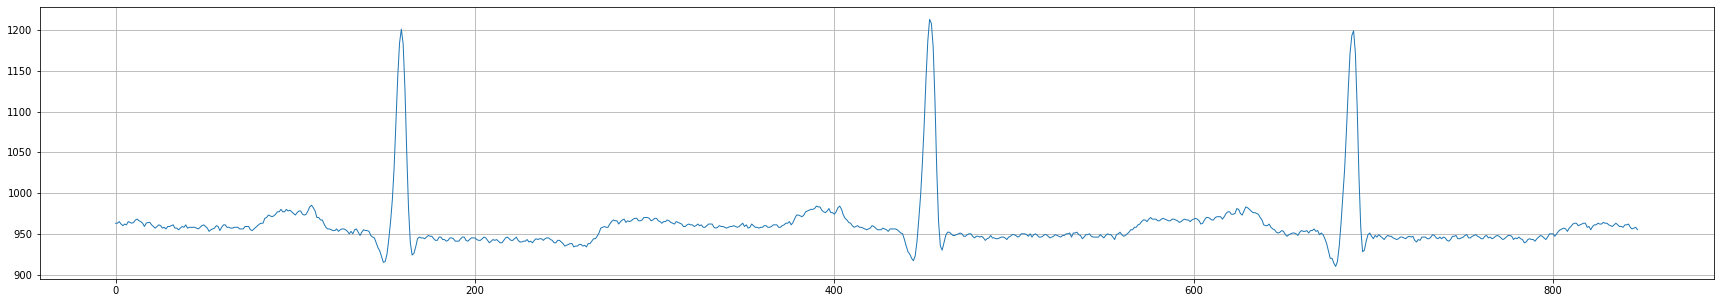

In [ ]:
plt.plot(X[4])
print(y[4])

0


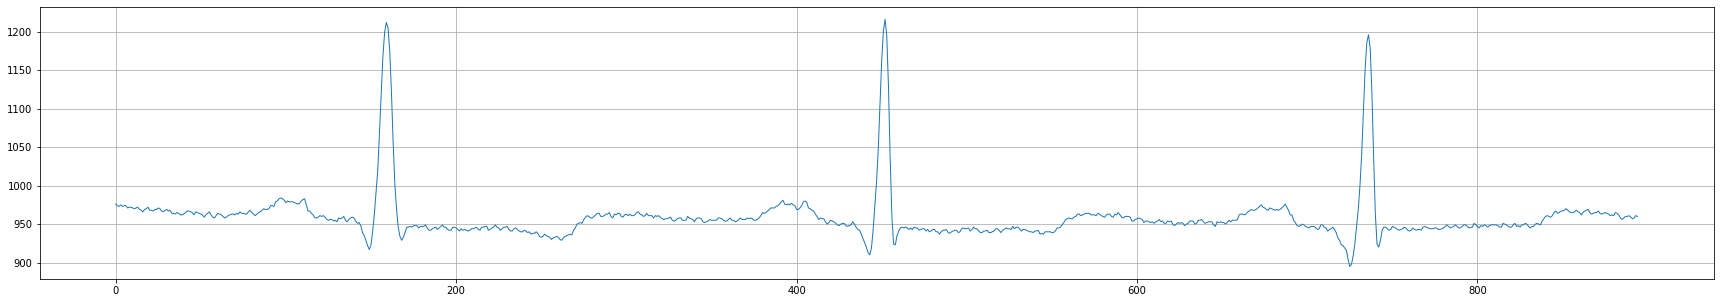

In [ ]:
plt.plot(X[0])
print(y[0])

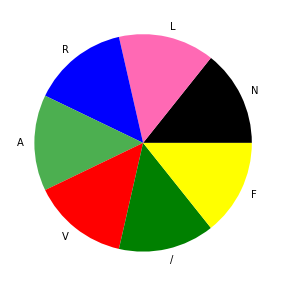

In [ ]:
mycolors = ["black", "hotpink", "b", "#4CAF50",'red', 'green', 'yellow', 'orange']
plt.pie(count_classes, labels = ['N', 'L', 'R', 'A', 'V', '/','F'], colors = mycolors)
plt.show() 

In [14]:
def normalize(arr):
    t_min = np.min(arr)
    t_max = np.max(arr)
    norm_arr = []
    for i in arr:
        temp = (i - t_min)/(t_max - t_min)
        norm_arr.append(temp)
    return np.array(norm_arr)

In [15]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 65.6 MB/s eta 0:00:00


In [21]:
from scipy.spatial.distance import pdist, squareform

def rec_plot(s, eps, steps):
    d = pdist(s)
    d = np.floor(d/eps)
    d[d>steps] = steps
    Z = squareform(d)
    return Z

def generate_recurrence_plot(ecg_sample, path, file_name, label):
  my_dpi=300
  f = plt.figure(figsize=(224/my_dpi, 224/my_dpi), dpi=my_dpi)
  b = plt.imshow(rec_plot(np.array(ecg_sample).reshape(-1,1), eps=0.7, steps=10), cmap='gray') 
  plt.savefig(path+label+'/'+file_name)
  f.clf()
  plt.close(f)

#generate_recurrence_plot(X[0],'/content/drive/MyDrive','image_testiه','l')

In [52]:
path_train = '/content/drive/MyDrive/hann/mit_train/'
path_val = '/content/drive/MyDrive/hann/mit_val/'

In [59]:
path_train = '/content/drive/MyDrive/recurrence_plot/mit_train/'
path_val = '/content/drive/MyDrive/recurrence_plot/mit_val/'

In [3]:
path_train = '/content/drive/MyDrive/triang/mit_train/'
path_val = '/content/drive/MyDrive/triang/mit_val/'

In [8]:
path_train = '/content/drive/MyDrive/parzen/mit_train/'
path_val = '/content/drive/MyDrive/parzen/mit_val/'

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
print(len(X_train),len(X_test))

5601 1401


In [11]:
import librosa
import librosa.display
from matplotlib.colors import LinearSegmentedColormap

def generate_stft_img(ecg_sample, n_fft , hop_length , pad_mode, window, path, file_name, label):

    cmap=LinearSegmentedColormap.from_list('gyr',["g", "y", "r"], N=256)
    my_dpi=300
    f = plt.figure(figsize=(224/my_dpi, 224/my_dpi), dpi=my_dpi)
    plt.ioff()
    D = np.abs(librosa.stft(ecg_sample, n_fft=n_fft, win_length=n_fft, hop_length = hop_length, pad_mode = pad_mode, window = window))
    db = librosa.amplitude_to_db(D,ref=np.max)
    plt.axis('off')
    img = librosa.display.specshow(db, sr=360, hop_length = hop_length, y_axis='log', x_axis='time', cmap='rainbow')
    plt.savefig(path+label+'/'+file_name)
    f.clf()
    plt.close(f)

In [29]:
labels = ['N', 'L', 'R', 'A', 'V', '/','F']
for i in range(0,len(X_train)):
  tmp_name = 'image_' + str(i)
  if labels[int(y_train[i])] == '/':
    generate_recurrence_plot(normalize(np.array(X_train[i])), path = path_train, file_name = tmp_name, label = 'P')
    #generate_stft_img(normalize(np.array(X_train[i])), n_fft = 256, hop_length = 128, pad_mode='wrap',window='hann', path = path_train, file_name = tmp_name, label = 'P')
  else:
    generate_recurrence_plot(normalize(np.array(X_train[i])), path = path_train, file_name = tmp_name, label = labels[int(y_train[i])])
    #generate_stft_img(normalize(np.array(X_train[i])), n_fft = 256, hop_length = 128, pad_mode='wrap',window='hann', path = path_train, file_name = tmp_name, label = labels[int(y_train[i])])  

In [30]:
for j in range(0,len(X_test)):
  tmp_name = 'image_' + str(j)
  if labels[int(y_test[j])] == '/':
    generate_recurrence_plot(normalize(np.array(X_test[j])), path = path_val, file_name = tmp_name, label = 'P')
    #generate_stft_img(normalize(np.array(X_test[j])), n_fft = 256, hop_length = 128, pad_mode='wrap',window='hann', path = path_val, file_name = tmp_name, label = 'P')
  else:
    generate_recurrence_plot(normalize(np.array(X_test[j])), path = path_val, file_name = tmp_name, label = labels[int(y_test[j])])
    #generate_stft_img(normalize(np.array(X_test[j])), n_fft = 256, hop_length = 128, pad_mode='wrap',window='hann', path = path_val, file_name = tmp_name, label = labels[int(y_test[j])])  

In [12]:
labels = ['N', 'L', 'R', 'A', 'V', '/','F']
for i in range(0,len(X_train)):
  tmp_name = 'image_' + str(i)
  if labels[int(y_train[i])] == '/':
    generate_stft_img(normalize(np.array(X_train[i])), n_fft = 256, hop_length = 128, 
                      pad_mode='wrap',window='parzen', path = path_train, file_name = tmp_name, label = 'P')
  else:
    generate_stft_img(normalize(np.array(X_train[i])), n_fft = 256, hop_length = 128, 
                      pad_mode='wrap',window='parzen', path = path_train, file_name = tmp_name, label = labels[int(y_train[i])])  

In [13]:
for j in range(0,len(X_test)):
  tmp_name = 'image_' + str(j)
  if labels[int(y_test[j])] == '/':
    generate_stft_img(normalize(np.array(X_test[j])), n_fft = 256, hop_length = 128, 
                      pad_mode='wrap',window='parzen', path = path_val, file_name = tmp_name, label = 'P')
  else:
    generate_stft_img(normalize(np.array(X_test[j])), n_fft = 256, hop_length = 128, 
                      pad_mode='wrap',window='parzen', path = path_val, file_name = tmp_name, label = labels[int(y_test[j])])  

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [5]:
tr = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)
train_dataset = tr.flow_from_directory(path_train, target_size = (224,224),batch_size = 128, class_mode='categorical', shuffle=True, seed = 42)
test_dataset = val.flow_from_directory(path_val, batch_size = 128, target_size = (224,224), class_mode='categorical', shuffle=False, seed = 42)

Found 5601 images belonging to 7 classes.
Found 1401 images belonging to 7 classes.


In [16]:
train_dataset.class_indices

{'A': 0, 'F': 1, 'L': 2, 'N': 3, 'P': 4, 'R': 5, 'V': 6}

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.compile(loss = 'categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

In [8]:
model_fit = model.fit(train_dataset, epochs = 10, validation_data = test_dataset)

Epoch 1/10
44/44 [==============================] - 4232s 96s/step - loss: 1.7367 - accuracy: 0.4481 - val_loss: 0.5889 - val_accuracy: 0.8344
Epoch 2/10
44/44 [==============================] - 34s 770ms/step - loss: 0.4086 - accuracy: 0.8706 - val_loss: 0.3285 - val_accuracy: 0.8901
Epoch 3/10
44/44 [==============================] - 30s 670ms/step - loss: 0.2539 - accuracy: 0.9122 - val_loss: 0.2517 - val_accuracy: 0.9151
Epoch 4/10
44/44 [==============================] - 34s 774ms/step - loss: 0.1729 - accuracy: 0.9430 - val_loss: 0.1896 - val_accuracy: 0.9386
Epoch 5/10
44/44 [==============================] - 29s 652ms/step - loss: 0.1285 - accuracy: 0.9547 - val_loss: 0.1549 - val_accuracy: 0.9507
Epoch 6/10
44/44 [==============================] - 29s 658ms/step - loss: 0.0955 - accuracy: 0.9673 - val_loss: 0.0842 - val_accuracy: 0.9714
Epoch 7/10
44/44 [==============================] - 29s 659ms/step - loss: 0.0609 - accuracy: 0.9811 - val_loss: 0.0753 - val_accuracy: 0.9772

In [9]:
from keras.models import load_model
model.save('/content/drive/MyDrive/hann/my_model.h5')  

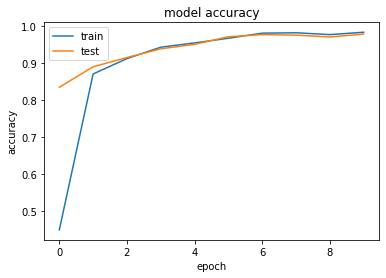

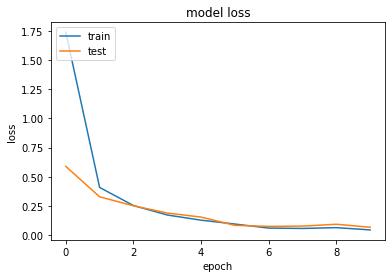

In [10]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.compile(loss = 'categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 256)     

In [34]:
model_fit = model.fit(train_dataset, epochs = 10, validation_data = test_dataset)

Epoch 1/10
44/44 [==============================] - 30s 630ms/step - loss: 1.1740 - accuracy: 0.6824 - val_loss: 0.2685 - val_accuracy: 0.9058
Epoch 2/10
44/44 [==============================] - 30s 687ms/step - loss: 0.1521 - accuracy: 0.9566 - val_loss: 0.1319 - val_accuracy: 0.9636
Epoch 3/10
44/44 [==============================] - 33s 741ms/step - loss: 0.0888 - accuracy: 0.9707 - val_loss: 0.1038 - val_accuracy: 0.9665
Epoch 4/10
44/44 [==============================] - 27s 613ms/step - loss: 0.0524 - accuracy: 0.9829 - val_loss: 0.1203 - val_accuracy: 0.9657
Epoch 5/10
44/44 [==============================] - 27s 615ms/step - loss: 0.0468 - accuracy: 0.9830 - val_loss: 0.1165 - val_accuracy: 0.9679
Epoch 6/10
44/44 [==============================] - 29s 648ms/step - loss: 0.0242 - accuracy: 0.9920 - val_loss: 0.1033 - val_accuracy: 0.9779
Epoch 7/10
44/44 [==============================] - 27s 616ms/step - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.0815 - val_accuracy: 0.9750

In [35]:
from keras.models import load_model
model.save('/content/drive/MyDrive/recurrence_plot/my_model.h5')  

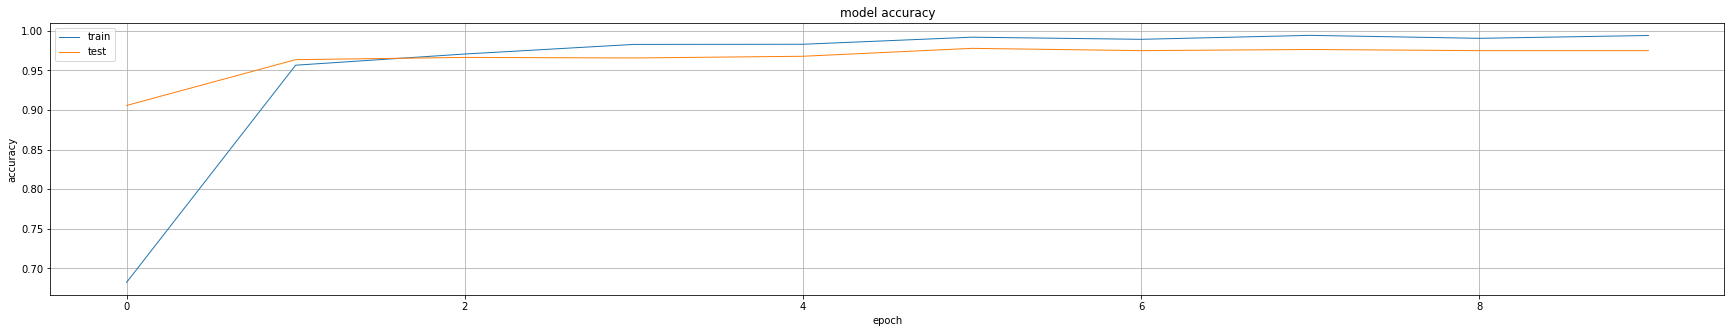

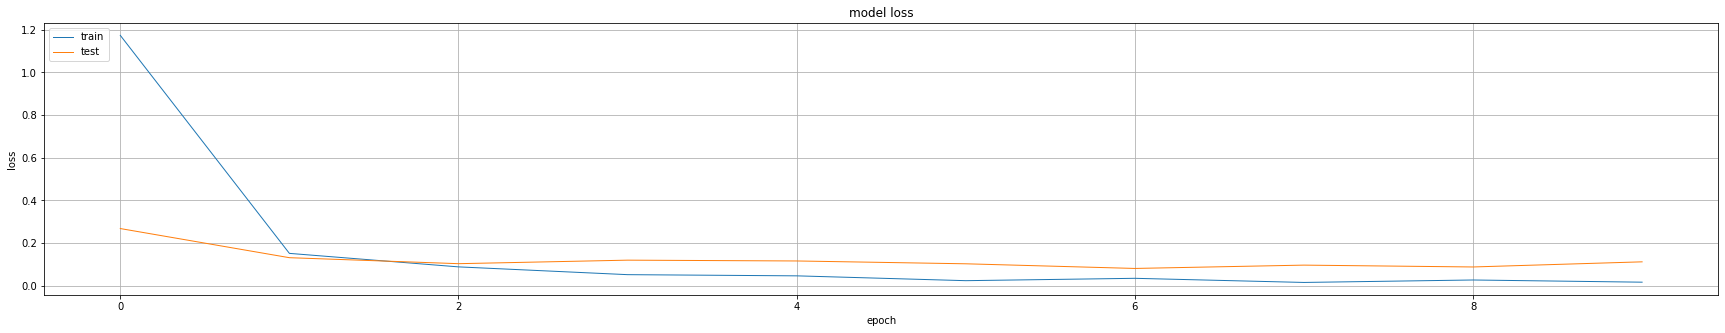

In [36]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.compile(loss = 'categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 26, 26, 256)     

In [50]:
model_fit = model.fit(train_dataset, epochs = 10, validation_data = test_dataset)

Epoch 1/10
44/44 [==============================] - 32s 685ms/step - loss: 1.2136 - accuracy: 0.5808 - val_loss: 0.4373 - val_accuracy: 0.8779
Epoch 2/10
44/44 [==============================] - 30s 669ms/step - loss: 0.2745 - accuracy: 0.9100 - val_loss: 0.2032 - val_accuracy: 0.9372
Epoch 3/10
44/44 [==============================] - 35s 785ms/step - loss: 0.1462 - accuracy: 0.9541 - val_loss: 0.1093 - val_accuracy: 0.9615
Epoch 4/10
44/44 [==============================] - 29s 663ms/step - loss: 0.1016 - accuracy: 0.9686 - val_loss: 0.0864 - val_accuracy: 0.9714
Epoch 5/10
44/44 [==============================] - 30s 670ms/step - loss: 0.0827 - accuracy: 0.9720 - val_loss: 0.0843 - val_accuracy: 0.9779
Epoch 6/10
44/44 [==============================] - 29s 651ms/step - loss: 0.0677 - accuracy: 0.9786 - val_loss: 0.0807 - val_accuracy: 0.9736
Epoch 7/10
44/44 [==============================] - 29s 664ms/step - loss: 0.0501 - accuracy: 0.9841 - val_loss: 0.0721 - val_accuracy: 0.9793

In [51]:
from keras.models import load_model
model.save('/content/drive/MyDrive/triang/my_model.h5')  

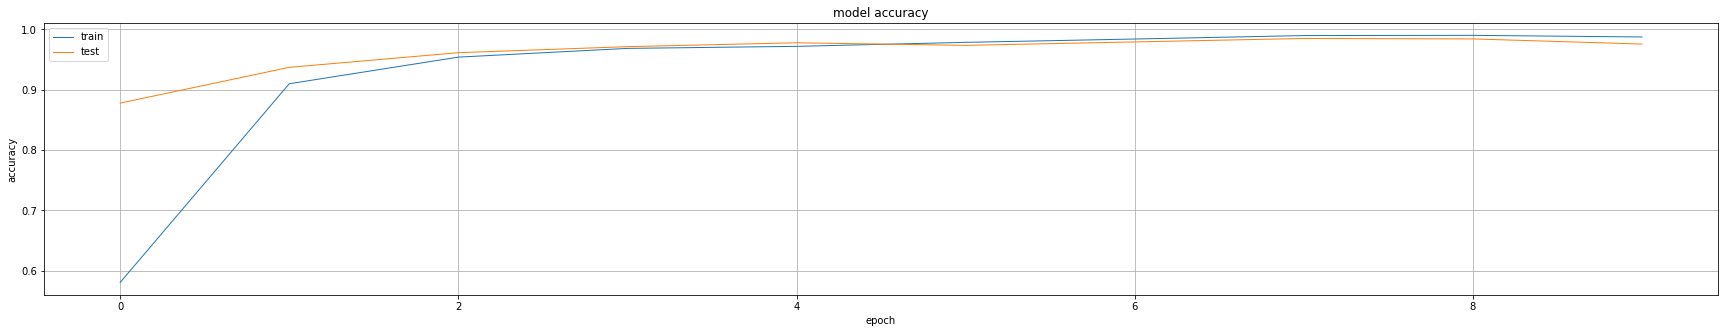

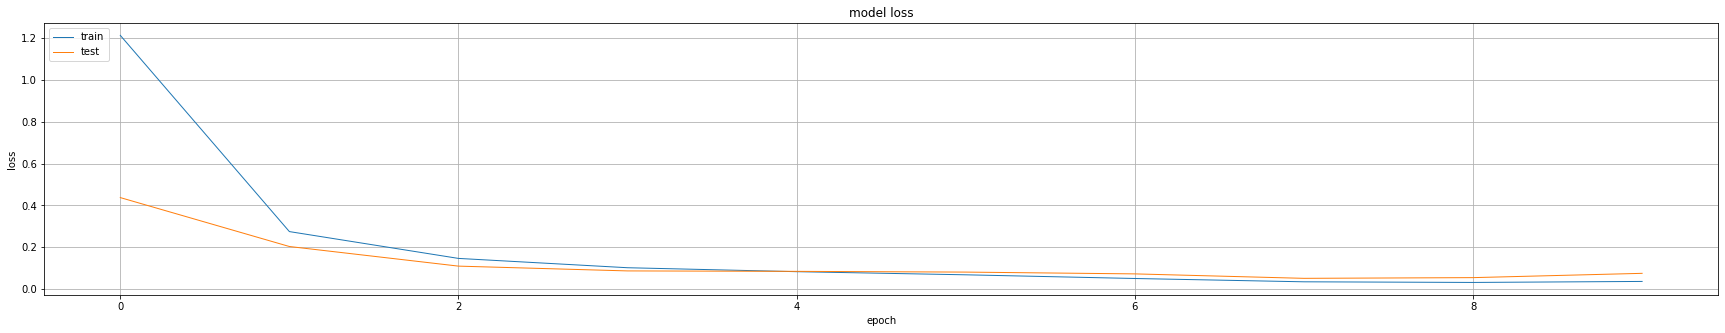

In [52]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.compile(loss = 'categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

In [18]:
model_fit = model.fit(train_dataset, epochs = 10, validation_data = test_dataset)

Epoch 1/10
44/44 [==============================] - 56s 887ms/step - loss: 1.4674 - accuracy: 0.5456 - val_loss: 0.3540 - val_accuracy: 0.8794
Epoch 2/10
44/44 [==============================] - 29s 657ms/step - loss: 0.2291 - accuracy: 0.9214 - val_loss: 0.2142 - val_accuracy: 0.9386
Epoch 3/10
44/44 [==============================] - 37s 844ms/step - loss: 0.1462 - accuracy: 0.9488 - val_loss: 0.1229 - val_accuracy: 0.9622
Epoch 4/10
44/44 [==============================] - 29s 661ms/step - loss: 0.0877 - accuracy: 0.9720 - val_loss: 0.0993 - val_accuracy: 0.9629
Epoch 5/10
44/44 [==============================] - 29s 659ms/step - loss: 0.0724 - accuracy: 0.9757 - val_loss: 0.0807 - val_accuracy: 0.9757
Epoch 6/10
44/44 [==============================] - 29s 666ms/step - loss: 0.0542 - accuracy: 0.9836 - val_loss: 0.0859 - val_accuracy: 0.9722
Epoch 7/10
44/44 [==============================] - 30s 672ms/step - loss: 0.0394 - accuracy: 0.9873 - val_loss: 0.0644 - val_accuracy: 0.9764

In [19]:
from keras.models import load_model
model.save('/content/drive/MyDrive/parzen/my_model.h5')  

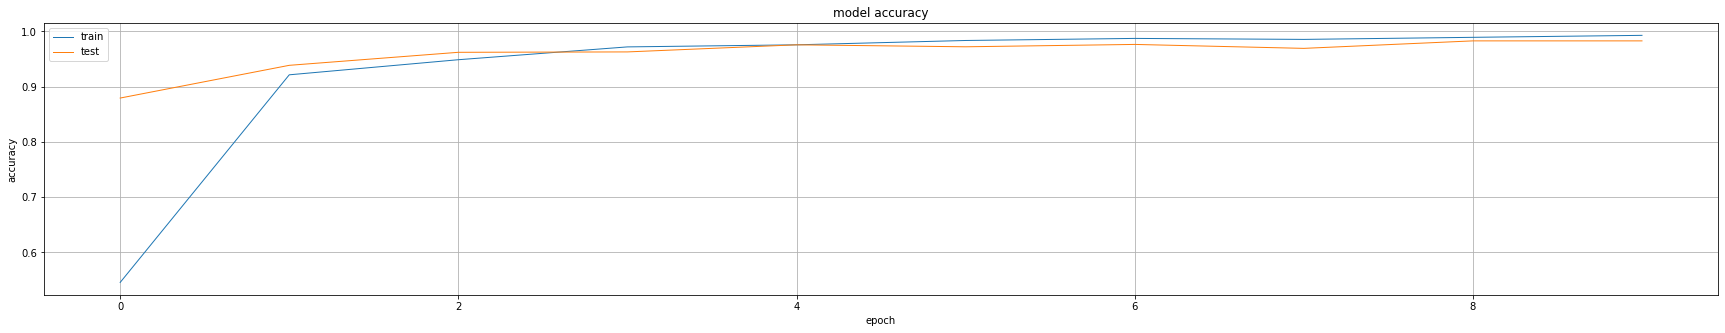

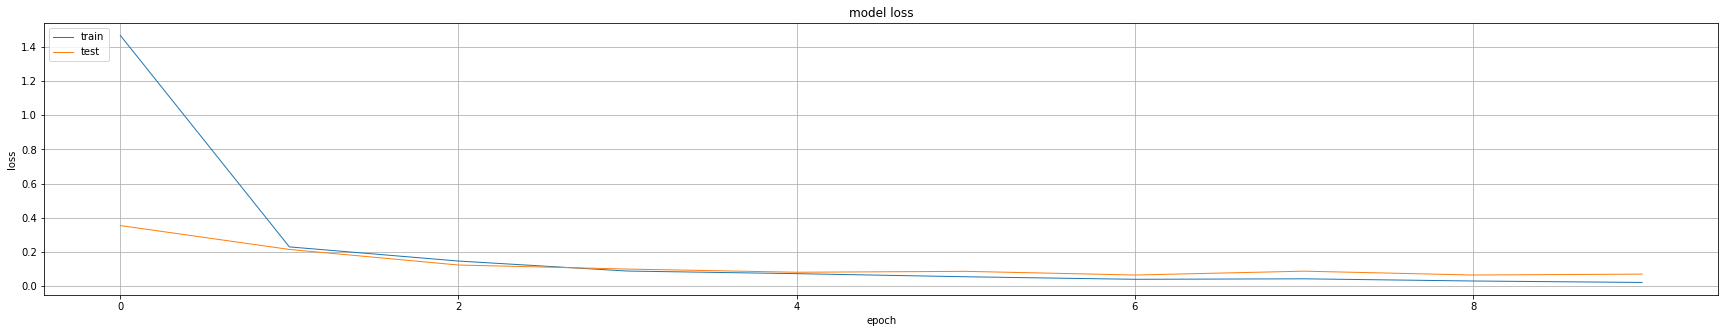

In [20]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [23]:
predictions = model.predict(test_dataset)
final_pred = np.argmax(predictions, axis=-1)
print(final_pred.shape)

11/11 [==============================] - 5s 447ms/step
(1401,)


In [7]:
test_labels = []

for i in range(0,len(test_dataset)):
    test_labels.extend(np.array(test_dataset[i][1]))

print(test_labels)    

[array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 

In [8]:
a=np.array(test_labels)
target = np.where(a==1)[1]
target

array([0, 0, 0, ..., 6, 6, 6])

Parzen Window Results

In [37]:
model = load_model('/content/drive/MyDrive/parzen/my_model.h5')
predictions = model.predict(test_dataset)
final_pred = np.argmax(predictions, axis=-1)
print('precision_score: ',precision_score(target, final_pred, average='macro'))
print('accuracy_score:  ',accuracy_score(target, final_pred))
print('recall_score:    ',recall_score(target, final_pred, average='macro'))
print('f1_score:        ',f1_score(target, final_pred, average='macro'))

precision_score:  0.9830114474008692
accuracy_score:   0.9828693790149893
recall_score:     0.9829248585593763
f1_score:         0.9828997234552734


In [58]:
model = load_model('/content/drive/MyDrive/hann/my_model.h5')
predictions = model.predict(test_dataset)
final_pred = np.argmax(predictions, axis=-1)

print('precision_score: ',precision_score(target, final_pred, average='macro'))
print('accuracy_score:  ',accuracy_score(target, final_pred))
print('recall_score:    ',recall_score(target, final_pred, average='macro'))
print('f1_score:        ',f1_score(target, final_pred, average='macro'))

11/11 [==============================] - 6s 494ms/step
precision_score:  0.9788049691636197
accuracy_score:   0.9785867237687366
recall_score:     0.9786655738018571
f1_score:         0.9787150748656849


In [63]:
model = load_model('/content/drive/MyDrive/recurrence_plot/my_model.h5')
predictions = model.predict(test_dataset)
final_pred = np.argmax(predictions, axis=-1)

print('precision_score: ',precision_score(target, final_pred, average='macro'))
print('accuracy_score:  ',accuracy_score(target, final_pred))
print('recall_score:    ',recall_score(target, final_pred, average='macro'))
print('f1_score:        ',f1_score(target, final_pred, average='macro'))

11/11 [==============================] - 5s 418ms/step
precision_score:  0.9751759733979185
accuracy_score:   0.9750178443968593
recall_score:     0.97511332273329
f1_score:         0.9746916263603784


In [11]:
model = load_model('/content/drive/MyDrive/triang/my_model.h5')
predictions = model.predict(test_dataset)
final_pred = np.argmax(predictions, axis=-1)

print('precision_score: ',precision_score(target, final_pred, average='macro'))
print('accuracy_score:  ',accuracy_score(target, final_pred))
print('recall_score:    ',recall_score(target, final_pred, average='macro'))
print('f1_score:        ',f1_score(target, final_pred, average='macro'))

11/11 [==============================] - 104s 9s/step
precision_score:  0.9776455651449562
accuracy_score:   0.9757316202712348
recall_score:     0.9756693950631041
f1_score:         0.976156463792888
